# OOP: Hopping Scan

In [27]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.experiments.scan import Scan
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
scan = Scan(datadir = "S:/UsersData/Martin/2019/03_Mar/01",
               exp_name = "scan_hopping_with_movement")

Avaliable data:
dict_keys(['LineNumber', 'V1(V)', 'Current1(A)', 'Y(um)', 'Z(um)', 'X(um)', 'dt(s)'])
Number of datapoints = (496799,)
Number of datapoints = 230693
Veryfying X, Y extents:
xmax: 57.026886807, xmin: 42.997528001,
ymax: 57.509079257, ymin: 42.982268746
xdiff: 14.029358805999998, ydiff: 14.526810511


In [41]:
# Select a line to look at
axis = "X"
ax_vals = np.unique(scan.dsdata["{}(um)".format(axis)])
print(ax_vals)
diff = np.mean(np.abs(np.diff(ax_vals)))
coord = 45.01
sel = np.where(np.logical_and(
                        scan.dsdata["{}(um)".format(axis)] > coord - (diff - 0.2*diff),
                        scan.dsdata["{}(um)".format(axis)] < coord + (diff - 0.2*diff)))[0]

[43.00973541 43.01278725 43.50718711 43.51023896 43.51329081 44.01074251
 44.01379437 44.51124607 44.51429792 44.70961638 45.00564592 45.01174963
 45.01480148 45.50920133 45.51225318 46.00970489 46.01275674 46.48579363
 46.51020844 46.51326029 46.51631214 47.010712   47.01376385 47.48680074
 47.51121555 47.5142674  48.01171911 48.01477096 48.50001526 48.50917081
 48.51222266 49.00357067 49.00967437 49.01272622 49.50712607 49.51017792
 49.51322977 50.01068148 50.50813318 50.51118503 50.51423689 51.00863674
 51.01168859 51.01474044 51.50914029 51.51219215 51.51524399 52.006592
 52.00964385 52.0126957  52.50709555 52.5101474  52.51319926 53.00759911
 53.01065096 53.50810266 53.51115452 53.51420637 54.00860622 54.01165807
 54.01470992 54.50300607 54.50910977 54.51216163 54.51521348 55.00656148
 55.00961333 55.01266518 55.03097629 55.50706503 55.51011689 55.51316874
 55.52537614 56.00756859 56.01062044 56.01367229 56.01977599 56.50807215
 56.511124   56.51417585 57.0085757  57.01162755 57.0

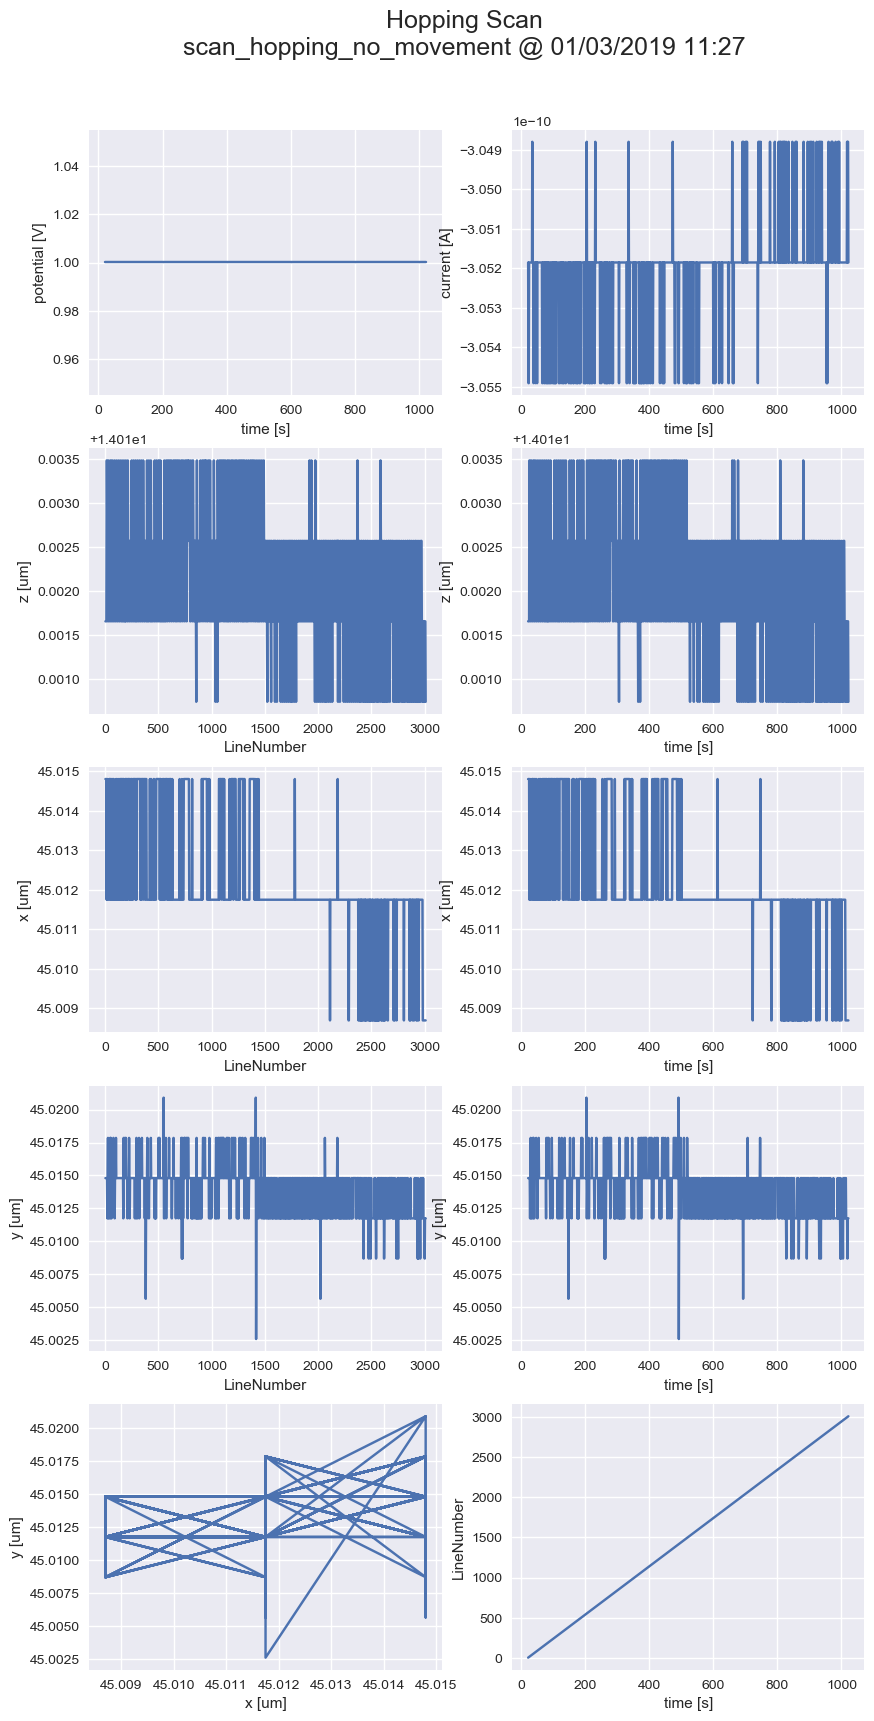

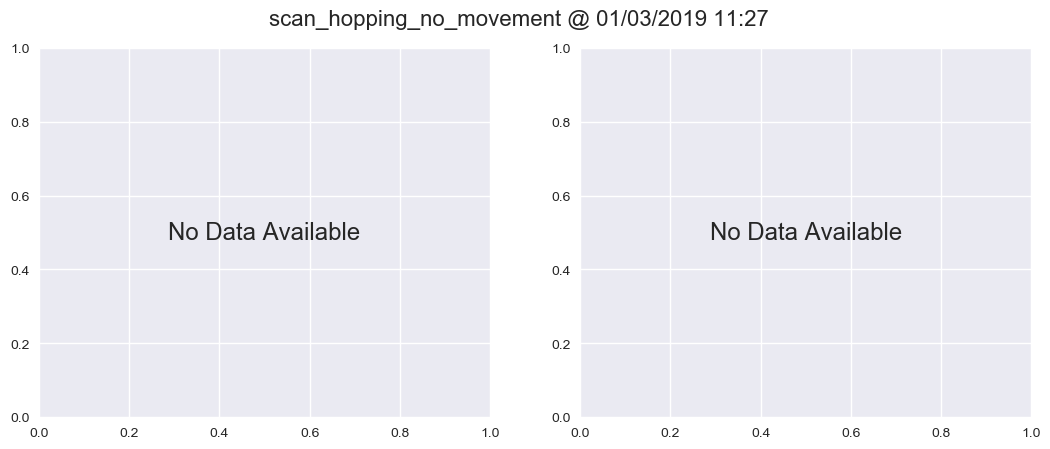

In [38]:
scan.plot_hopping_scan()

X(um) = 45.011


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


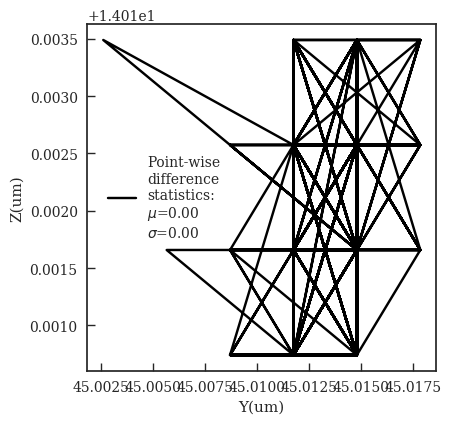

In [39]:
# Show single line once more separately
axis2 = "X" if axis == "Y" else "Y"
print("{}(um) = {:.3f}".format(axis, 
                               np.mean(scan.dsdata["{}(um)".format(axis)][sel])))
leg = "Point-wise difference statistics:\n$\mu$={:.2f}\n$\sigma$={:.2f}".format(
    np.mean(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))),
    np.std(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))))
plots.plot_generic([scan.dsdata["{}(um)".format(axis2)][sel]],
                  [scan.dsdata["Z(um)"][sel]],
                  ["{}(um)".format(axis2)], ["Z(um)"], leg)

Saved figure to S:\UsersData\Martin\2019\03_Mar\01\scan_hopping_no_movement_01032019_1127.pdf.


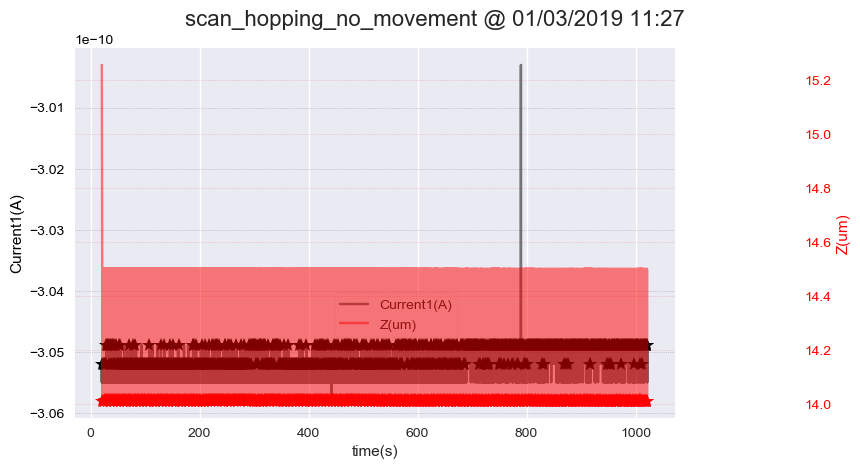

In [8]:
scan.plot_hops()

Saved figure to S:\UsersData\Martin\2019\03_Mar\01\scan_hopping_no_movement_01032019_1127.pdf.


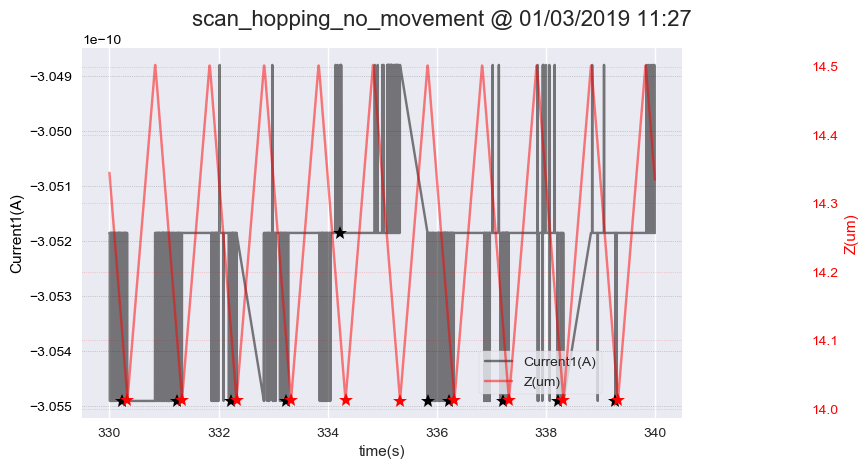

In [13]:
scan.plot_hops([330.0, 340.0])

In [11]:
ln_diffs = []
for ln in np.unique(scan.data["LineNumber"])[:-1]:
    ln1 = scan.data["Z(um)"][scan.data["LineNumber"] == ln][-1]
    ln2 = scan.data["Z(um)"][scan.data["LineNumber"] == ln + 3.0][0]
    ln_diffs.append(np.abs(ln2 - ln1))
print("Retract distance statistics:\n" + \
      "$\mu$={:.4f}\n$\sigma$={:.2f}".format(np.mean(ln_diffs), np.std(ln_diffs)))

Retract distance statistics:
$\mu$=0.4870
$\sigma$=0.00


Saved dataframe to S:/UsersData/Martin/2019/02_Feb/26/scan3/scan3\scan3_annot.pkl.


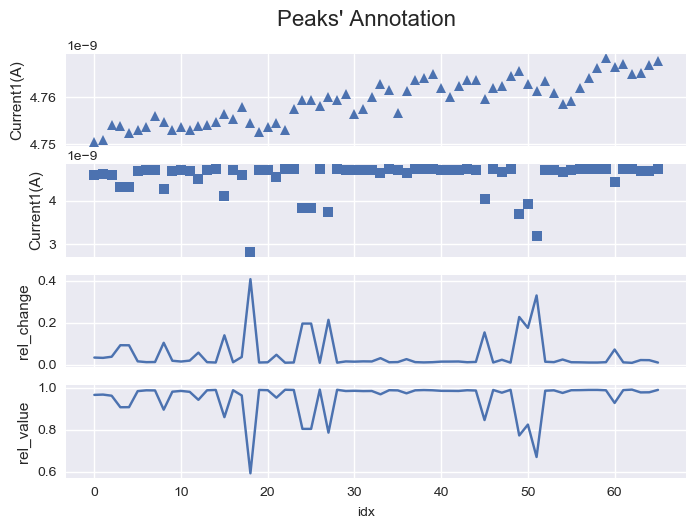

In [69]:
scan.annotate_peaks(sel = [1180.0, 1290.0], window_size = 250)

# OOP: Approach

In [33]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.sicm import Approach, Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['LineNumber', 'Current1(A)', 'V1(V)', 'dt(s)', 'Z(um)', 'X(um)', 'Y(um)'])
Number of datapoints = (82721,)
Number of datapoints = 34160


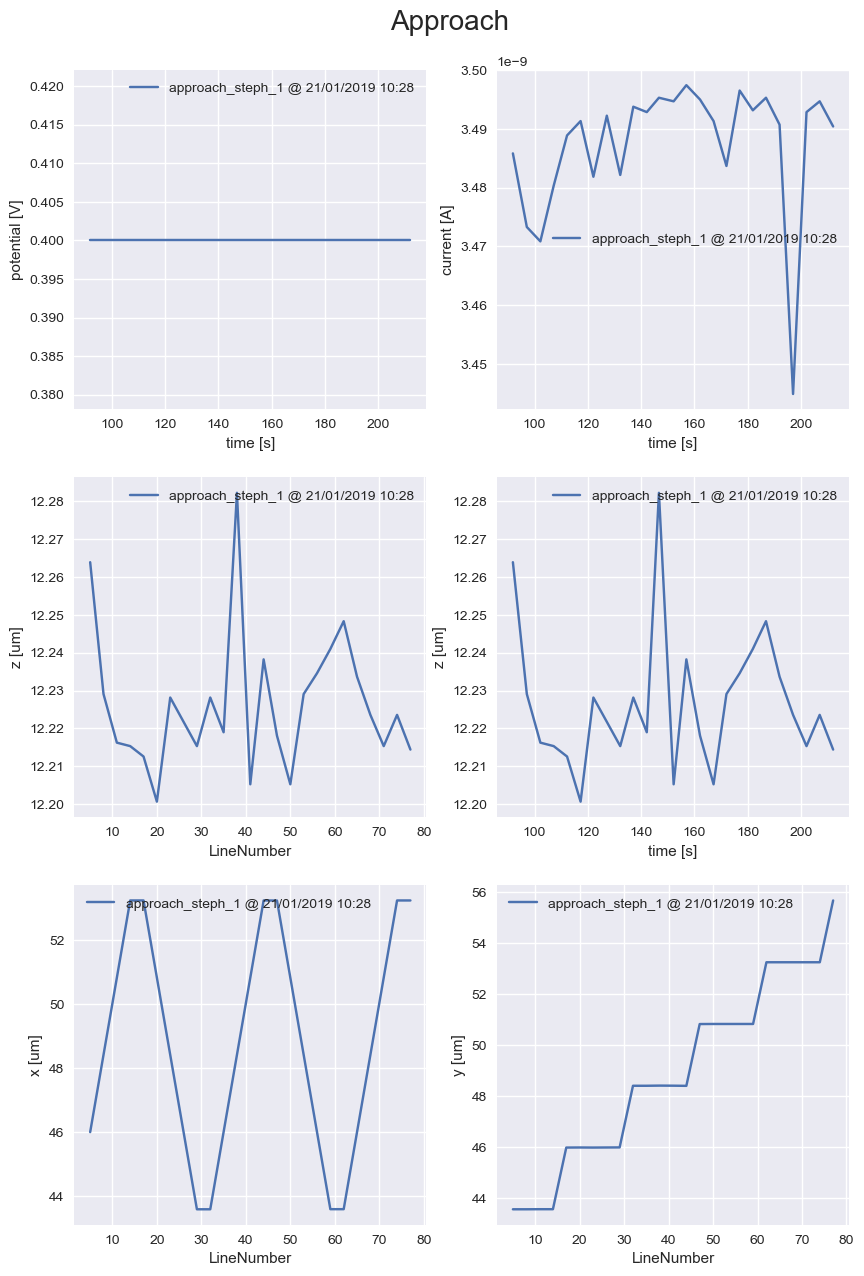

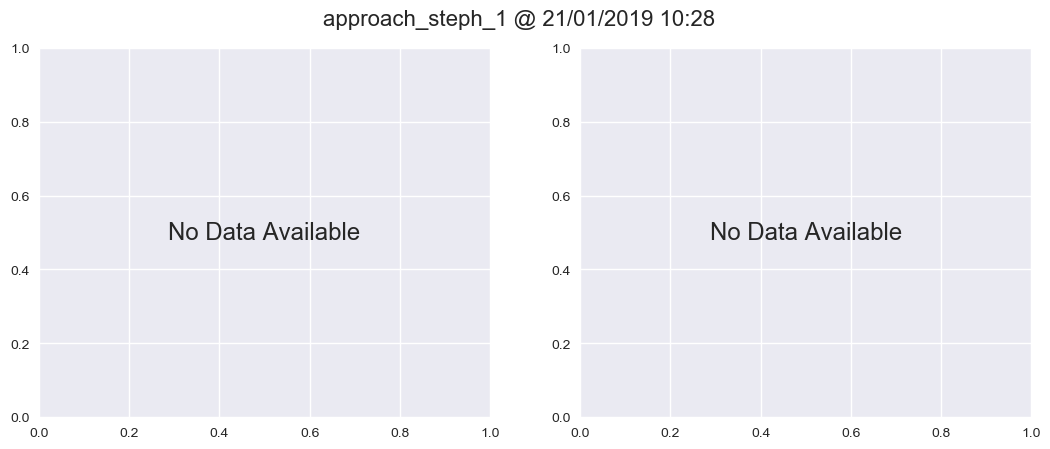

> c:\users\mholub\git\sicm\sicm\measurements\signal.py(88)analyze()
-> if range is not None:
(Pdb) c


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 64 is greater than input length  = 25, using nperseg = 25
  .format(nperseg, input_length))


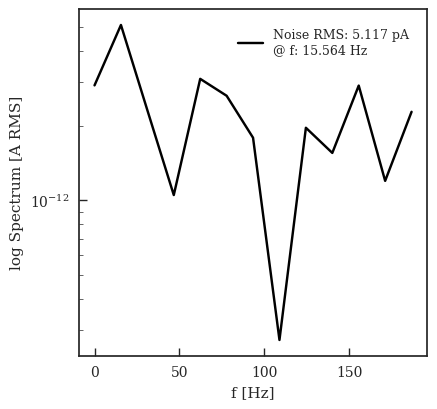

In [37]:
app = Approach(datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph",
              exp_name = "approach_steph_1")
# this is very simplistic but does the job for now.
app.plot()
sig = Signal(x = np.cumsum(app.dsdata["dt(s)"]), 
                      y = app.dsdata["Current1(A)"])
sig.analyze(range = [0., 50.0], what = "psd")

# Getting noise level

In [94]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np
from os import path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do it from `Watch Current` Data

In [161]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/pdms/10nm"
exp_name = "watchcurrent_noisepattern"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['V1(V)', 'LineNumber', 'Current1(A)', 'dt(s)'])
Number of datapoints = (54798,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\watchcurrent_noisepattern_psd.pdf.


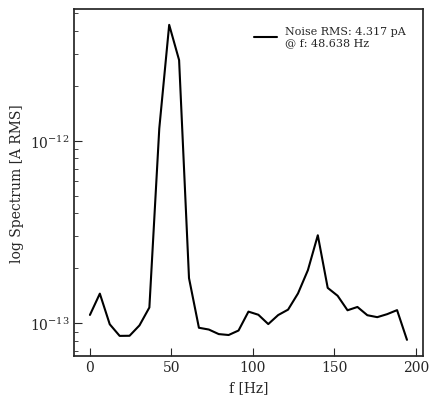

In [164]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
fpath = path.normpath(path.join(datadir, exp_name))
sig.analyze(what = "psd", fpath = fpath, range = [60.0, 130.0])

## Do it from `Approach Data`

In [197]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/steph_glass_plasmaclean/10nm/app2"
exp_name = "approach_noise_level_newtip"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)
fpath = path.normpath(path.join(datadir, exp_name))

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['Z(um)', 'LineNumber', 'Current1(A)', 'V1(V)', 'dt(s)'])
Number of datapoints = (70973,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\22\steph_glass_plasmaclean\10nm\app2\approach_noise_level_newtip_noise.pdf.


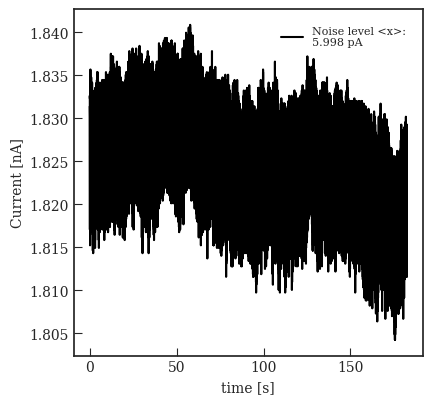

In [199]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(what = "noise", fpath = fpath)

# Signal

In [9]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'V1(V)', 'dt(s)'])
Number of datapoints = (303716,)


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


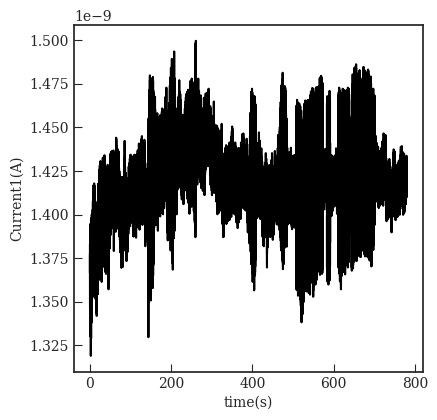

In [141]:
datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph_plasmacleaned"
exp_name = "funny_noise_patterns"


files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.plot("time(s)", "Current1(A)")

# CV

In [136]:
import sys
sys.path.append("..")

from sicm.sicm import CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'V1(V)', 'dt(s)'])
Number of datapoints = (303716,)
Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\funny_noise_patterns_21012019_1723.pdf.


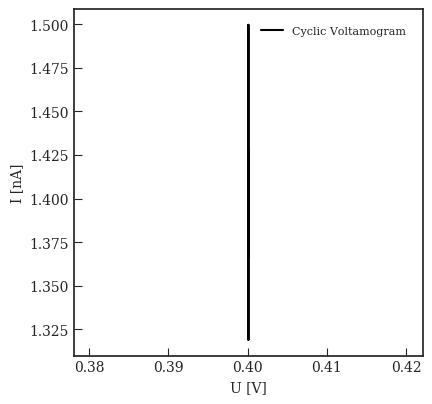

In [139]:
cv = CV(datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph_plasmacleaned",
        exp_name = "funny_noise_patterns")
# this is very simplistic but does the job for now.
cv.plot()

------------------
# Not used anymore

## Cyclic Voltametry

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, plots, analysis, utils

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [8]:
# vars
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

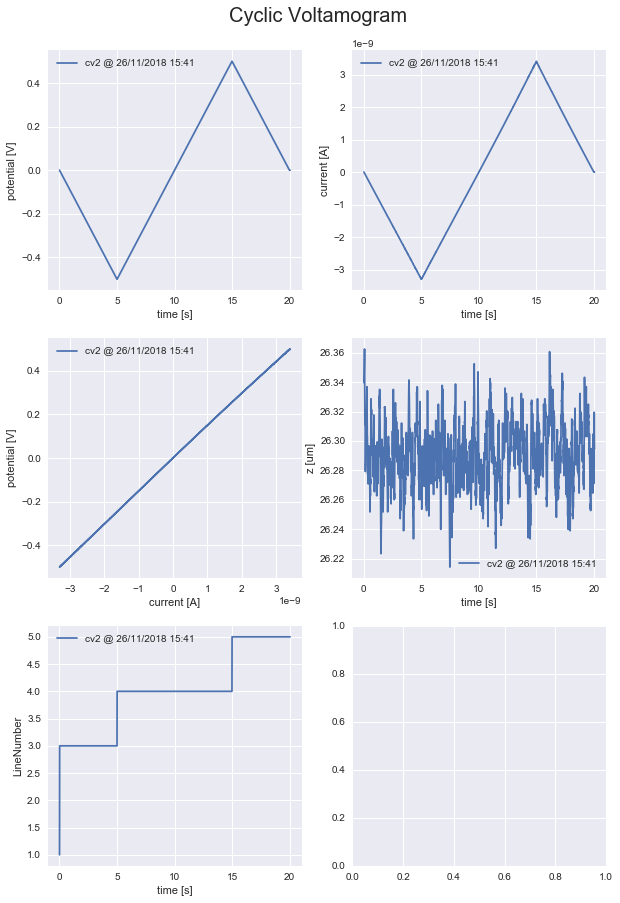

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))